In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
# Load datasets
pima = pd.read_csv('./data/pima/diabetes.csv')
starbucks = pd.read_csv('./data/starbucks/starbucks.csv')
starbucks.columns = starbucks.columns.str.strip()
netflix = pd.read_csv('./data/netflix/netflix_titles.csv')
netflix.columns = netflix.columns.str.strip()
netflix['release_year'] = pd.to_datetime(netflix['date_added'].str.strip(), errors='coerce').dt.year

In [60]:
# Inspect datasets
pima.head(), pima.info(), pima.describe()
starbucks.head(), starbucks.info(), starbucks.describe()
netflix.head(), netflix.info(), netflix.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category     

(  show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021        2021.0  PG-13     90 min   
 1  September 24, 2021        2021.0  TV-MA  2 Seasons   
 2  Septembe

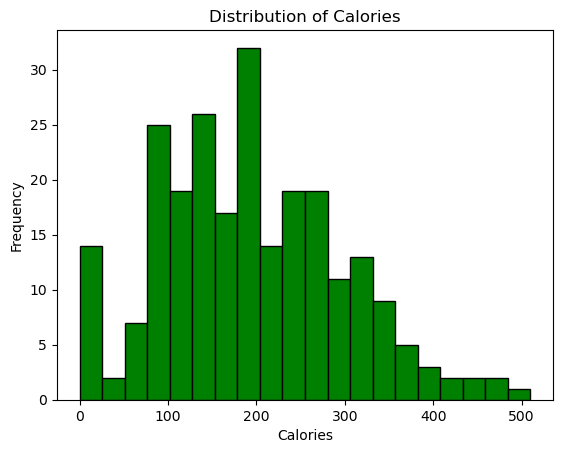

In [61]:
#Part 2: Univariate Analysis
# Starbucks - Calories
plt.hist(starbucks['Calories'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

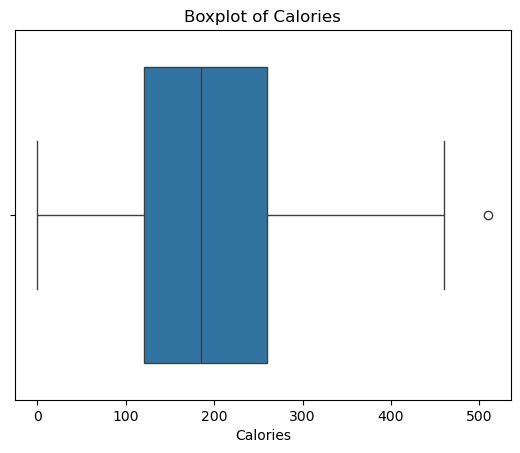

In [62]:
sns.boxplot(x=starbucks['Calories'])
plt.title('Boxplot of Calories')
plt.xlabel('Calories')
plt.show()

/tmp/ipykernel_2319/411988737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=netflix, palette='Set2')


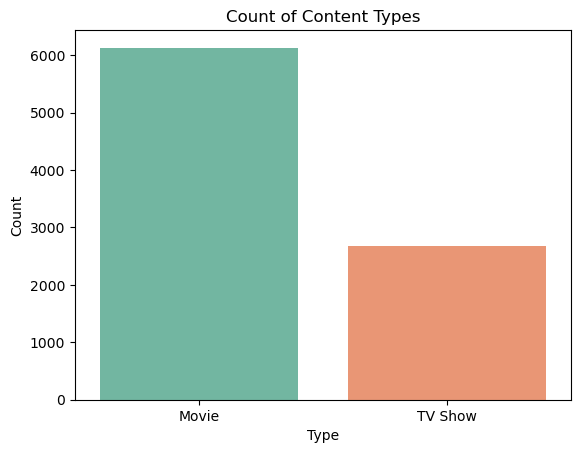

In [63]:
# Netflix - Content Type
sns.countplot(x='type', data=netflix, palette='Set2')
plt.title('Count of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

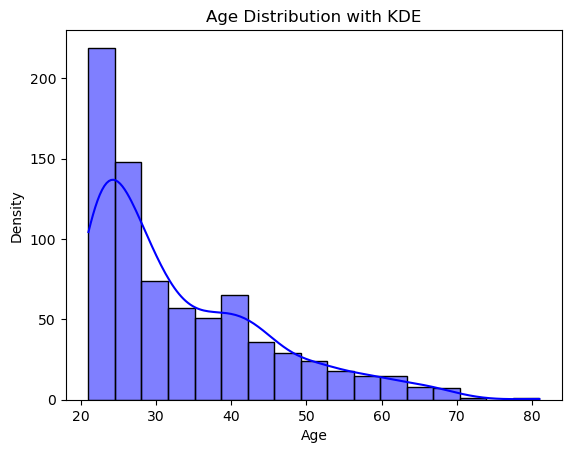

In [64]:
# PIMA - Age Distribution
sns.histplot(pima['Age'], kde=True, color='blue')
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

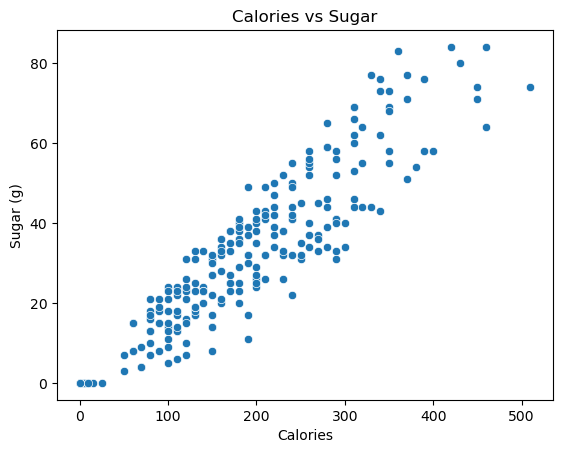

In [65]:
# Part 3: Bivariate Analysis
# Starbucks - Calories vs Sugars
sns.scatterplot(x='Calories', y='Sugars (g)', data=starbucks)
plt.title('Calories vs Sugar')
plt.xlabel('Calories')
plt.ylabel('Sugar (g)')
plt.show()

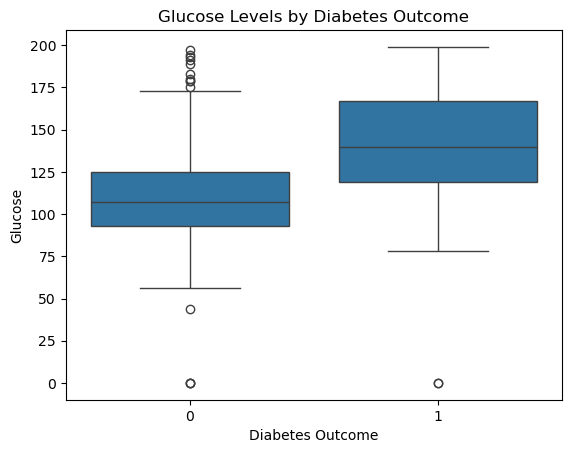

In [66]:
# PIMA - Glucose vs Outcome
sns.boxplot(x='Outcome', y='Glucose', data=pima)
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose')
plt.show()


In [70]:
# Strip spaces and coerce any invalid formats to NaT (Not a Time)
netflix['date_added'] = netflix['date_added'].astype(str).str.strip()

# Convert to datetime safely
netflix['release_year'] = pd.to_datetime(netflix['date_added'], errors='coerce').dt.year


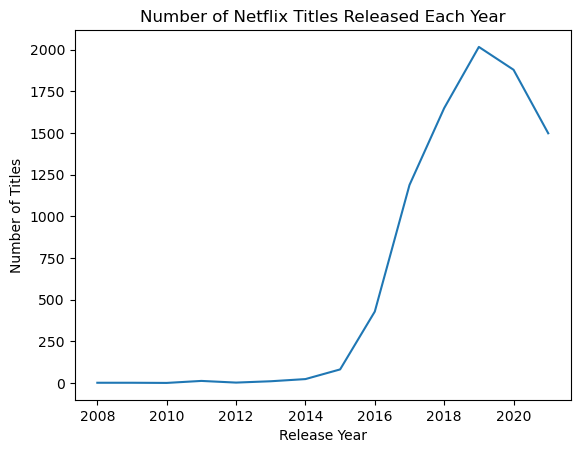

In [ ]:

# Netflix - Release Year
netflix['release_year'] = pd.to_datetime(netflix['date_added']).dt.year
release_counts = netflix['release_year'].value_counts().sort_index()
release_counts.plot(kind='line')
plt.title('Number of Netflix Titles Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


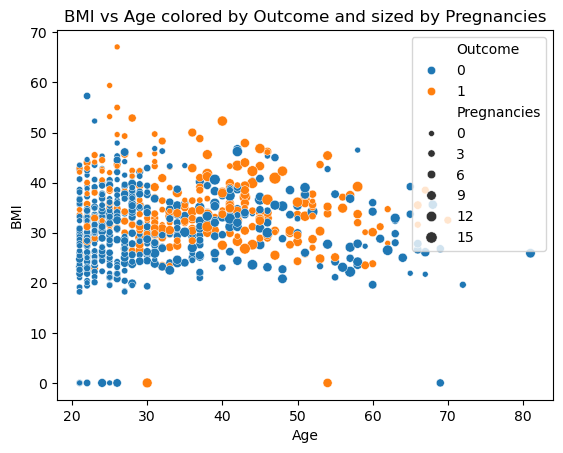

In [71]:
# Part 4: Multivariate Analysis
# PIMA - BMI vs Age by Outcome
sns.scatterplot(x='Age', y='BMI', hue='Outcome', size='Pregnancies', data=pima)
plt.title('BMI vs Age colored by Outcome and sized by Pregnancies')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

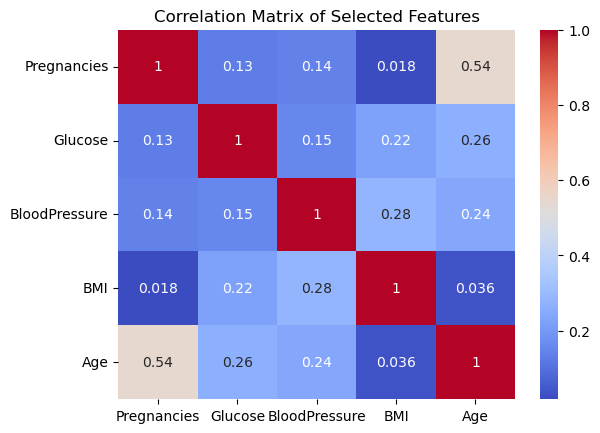

In [73]:
# PIMA - Correlation Heatmap
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']
corr = pima[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

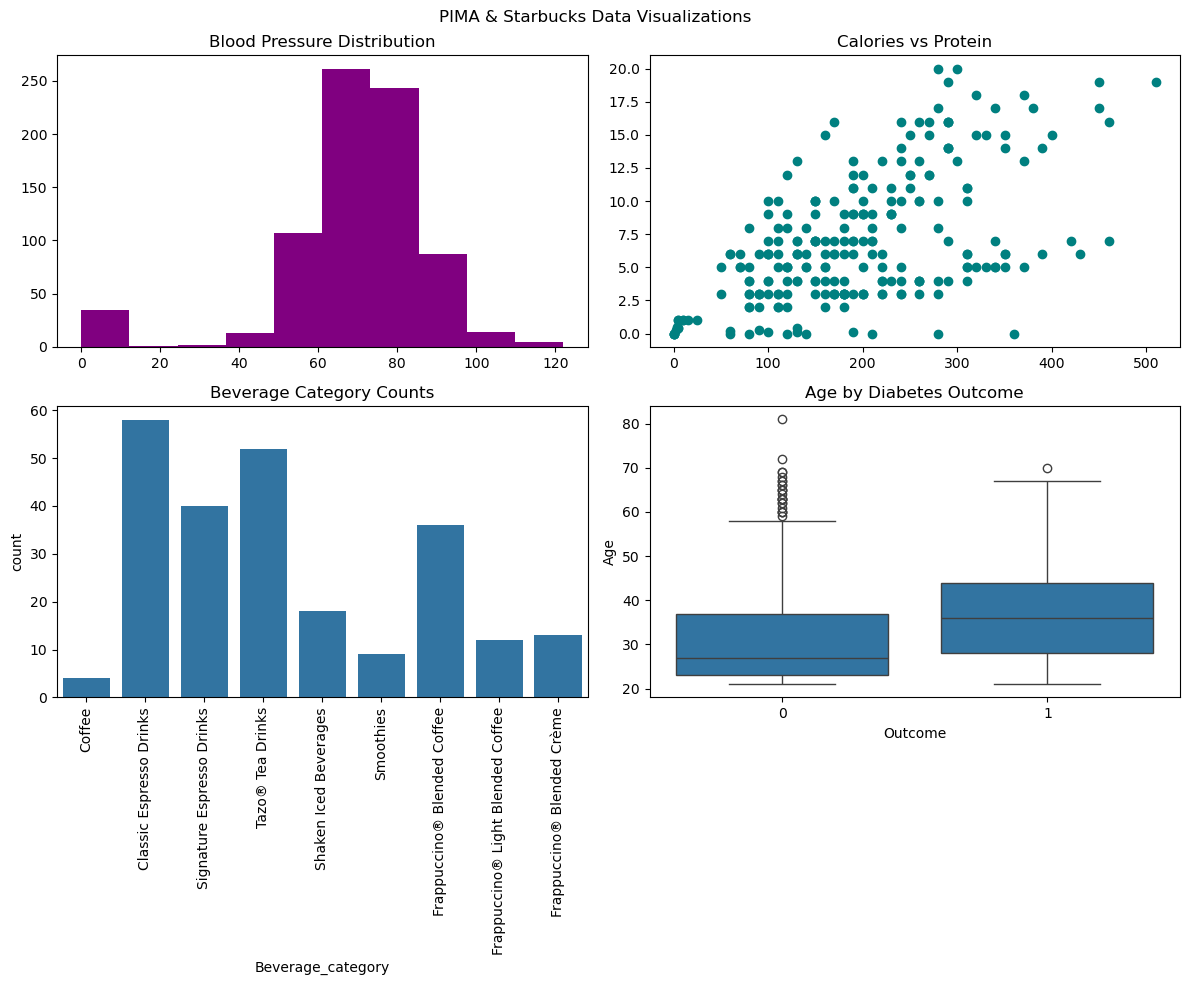

In [74]:
# Part 5: Subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Top-left
axs[0, 0].hist(pima['BloodPressure'].dropna(), color='purple')
axs[0, 0].set_title('Blood Pressure Distribution')

# Top-right
axs[0, 1].scatter(starbucks['Calories'], starbucks['Protein (g)'], color='teal')
axs[0, 1].set_title('Calories vs Protein')

# Bottom-left
sns.countplot(x='Beverage_category', data=starbucks, ax=axs[1, 0])
axs[1, 0].set_title('Beverage Category Counts')
axs[1, 0].tick_params(axis='x', rotation=90)

# Bottom-right
sns.boxplot(x='Outcome', y='Age', data=pima, ax=axs[1, 1])
axs[1, 1].set_title('Age by Diabetes Outcome')

fig.suptitle('PIMA & Starbucks Data Visualizations')
plt.tight_layout()
plt.show()


In [77]:
# Part 6: Bonus - Interactive & Geospatial Plotting
# Interactive Plot with Plotly Express
import plotly.express as px
fig = px.scatter(starbucks, x='Calories', y='Sugars (g)', 
                 hover_data=['Beverage'], color='Beverage_category',
                 title='Interactive Calories vs Sugar Plot')
fig.show()

# Useful features: Hover shows details like beverage name, and you can zoom, pan, and export the plot.

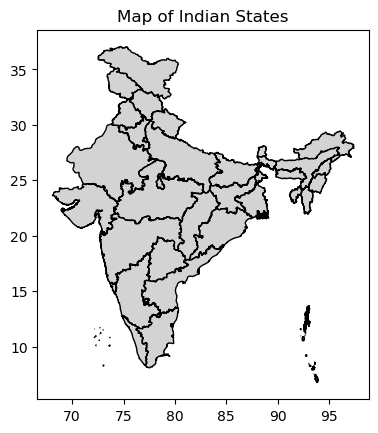

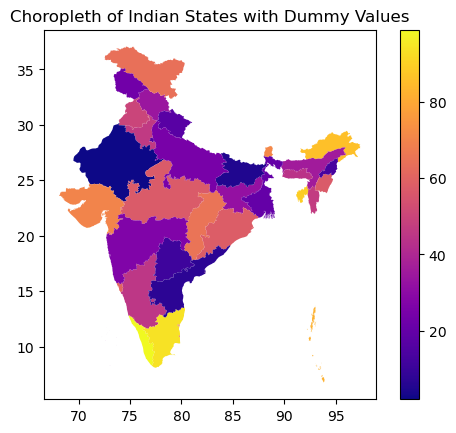

In [79]:
import geopandas as gpd
india_states = gpd.read_file("./data/Indian States/INDIA_STATES.geojson")

# Basic plot
india_states.plot(edgecolor='black', facecolor='lightgray')
plt.title("Map of Indian States")
plt.show()

# Choropleth with dummy data
india_states["dummy_val"] = np.random.randint(1, 100, india_states.shape[0])
india_states.plot(column="dummy_val", cmap="plasma", legend=True)
plt.title("Choropleth of Indian States with Dummy Values")
plt.show()
